In [1]:
from solution import *
import matplotlib.pyplot as plt

nns = {}
seeds = [100, 1000, 10000]
for seed in seeds:
    nn = NN(datapath='/Users/leandro/development/python/master/ml/hw3/cifar10.pkl',
                hidden_dims=(512, 256),
                lr=0.003,
                batch_size=100,
                seed=seed)
    nn.train_loop(50)
    nns[f'256-{seed}'] = nn
    
    nn = NN(datapath='/Users/leandro/development/python/master/ml/hw3/cifar10.pkl',
            hidden_dims=(512, 120, 120, 120, 120, 120, 120),
            lr=0.003,
            batch_size=100,
            seed=seed)
    nn.train_loop(50)
    nns[f'120-{seed}'] = nn

In [3]:
plt.interactive(True)
count = 0
f = plt.figure(figsize=(11, 20))
train_accuracy_list_256 = []
validation_accuracy_list_256 = []

train_accuracy_list_120 = []
validation_accuracy_list_120 = []

for seed in [100, 1000, 10000]:
    
    train_accuracy_list_256.append(nns[f'256-{seed}'].train_logs['train_accuracy'])
    validation_accuracy_list_256.append(nns[f'256-{seed}'].train_logs['validation_accuracy'])
    
    train_accuracy_list_120.append(nns[f'120-{seed}'].train_logs['train_accuracy'])
    validation_accuracy_list_120.append(nns[f'120-{seed}'].train_logs['validation_accuracy'])

train_accuracy_list_256 = np.array(train_accuracy_list_256)
validation_accuracy_list_256 = np.array(validation_accuracy_list_256)

train_accuracy_list_120 = np.array(train_accuracy_list_120)
validation_accuracy_list_120 = np.array(validation_accuracy_list_120)

<Figure size 792x1440 with 0 Axes>

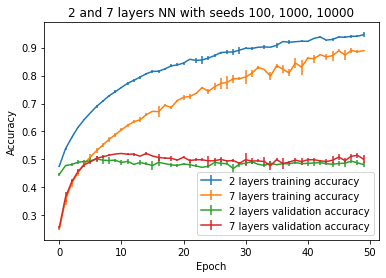

In [8]:
mean_train_accurracy_256 = np.mean(train_accuracy_list_256, axis=0)
mean_train_accurracy_120 = np.mean(train_accuracy_list_120, axis=0)
mean_validation_accurracy_256 = np.mean(validation_accuracy_list_256, axis=0)
mean_validation_accurracy_120 = np.mean(validation_accuracy_list_120, axis=0)

#plt.plot(list(range(50)), mean_train_accurracy_256, '-',label='2 layers training accurancy ')
#plt.plot(list(range(50)), mean_train_accurracy_120, '-',label='7 layers training accurancy')
#plt.plot(list(range(50)), mean_validation_accurracy_256, '-',label='2 layers validation accurancy')
#plt.plot(list(range(50)), mean_validation_accurracy_120, '-',label='7 layers validation accurancy')

std_train_accurracy_256 = np.std(train_accuracy_list_256,axis=0) * 0.9
std_train_accurracy_120 = np.std(train_accuracy_list_120,axis=0) * 0.9
std_validation_accurracy_256 = np.std(validation_accuracy_list_256,axis=0) * 0.9
std_validation_accurracy_120 = np.std(validation_accuracy_list_120,axis=0) * 0.9


plt.errorbar(list(range(50)), mean_train_accurracy_256, yerr=std_train_accurracy_256, label='2 layers training accuracy ')
plt.errorbar(list(range(50)), mean_train_accurracy_120, yerr=std_train_accurracy_120, label='7 layers training accuracy')
plt.errorbar(list(range(50)), mean_validation_accurracy_256, yerr=std_validation_accurracy_256, label='2 layers validation accuracy')
plt.errorbar(list(range(50)), mean_validation_accurracy_120, yerr=std_validation_accurracy_120, label='7 layers validation accuracy')

# 
# for i in range(len(soft_av_error)):
#   plt.errorbar(hiperparameter[i], soft_av_error[i], yerr=soft_sd_hard[i])
  
plt.title(f"2 and 7 layers NN with seeds 100, 1000, 10000")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [ ]:

 
    count += 1
    plt.plot(list(range(50)), nns[f'256-{seed}'].train_logs['train_accuracy'], '-',label='Training accurancy')
    plt.plot(list(range(50)), nns[f'256-{seed}'].train_logs['validation_accuracy'], '-',label='Validation accurancy')
    plt.title(f"2 hidden layers - seed {seed} ")
    plt.legend()
    plt.xlabel("Epoch");
    plt.ylabel("Accuracy")
 
    
    count += 1
    f.add_subplot(6,2,count)
    plt.plot(list(range(50)), nns[f'256-{seed}'].train_logs['train_loss'], '-',label='Training loss')
    plt.plot(list(range(50)), nns[f'256-{seed}'].train_logs['validation_loss'], '-',label='Validation loss')
    plt.title(f"2 hidden layers - seed {seed} ")
    plt.legend()
    plt.xlabel("Epoch");
    plt.ylabel("Loss")
    
    
    count += 1
    f.add_subplot(6,2,count)
    plt.plot(list(range(50)), nns[f'120-{seed}'].train_logs['train_accuracy'], '-',label='Training accurancy')
    plt.plot(list(range(50)), nns[f'120-{seed}'].train_logs['validation_accuracy'], '-',label='Validation accurancy')
    plt.title(f"7 hidden layers - seed {seed} ")
    plt.legend()
    plt.xlabel("Epoch");
    plt.ylabel("Accuracy")
 
    
    count += 1
    f.add_subplot(6,2,count)
    plt.plot(list(range(50)), nns[f'120-{seed}'].train_logs['train_loss'], '-',label='Training loss')
    plt.plot(list(range(50)), nns[f'120-{seed}'].train_logs['validation_loss'], '-',label='Validation loss')
    plt.title(f"7 hidden layers NN - seed {seed} ")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)

plt.tight_layout()
plt.show()